In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn) 

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [5]:
q1 = "select * from facts limit 5"
pd.read_sql_query(q1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [7]:
q2 = "select min(population), max(population), min(population_growth), max(population_growth) from facts"
pd.read_sql_query(q2, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [11]:
q3 = "select * from facts where population = 0"
pd.read_sql_query(q3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [12]:
q4 = "select * from facts where population = 7256490011"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


The least populated "country" is Antarctica which has a population of 0, and the world has a population of 7256490011. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f680ca15668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f680c963a58>]], dtype=object)

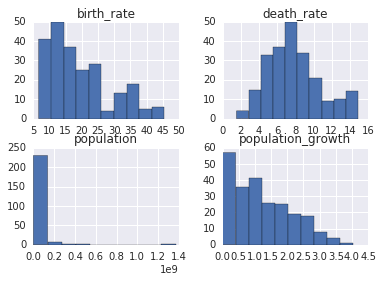

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

q5 = "select population, population_growth, birth_rate, death_rate from facts where name != 'World' and name != 'Antarctica'"
pd.read_sql_query(q5, conn).hist()